In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [14]:
train_data = pd.read_csv("/content/Google_Stock_Price_Train.csv")
test_data = pd.read_csv("/content/Google_Stock_Price_Test.csv")

training_set = train_data.iloc[:, 1:2].values
test_set = test_data.iloc[:, 1:2].values

scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [15]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(training_set_scaled, time_step)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0429
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0047
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0043
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0041
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0036
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0036
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0038
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0033
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0029
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0030
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0032
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0028
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0026
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0030
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0031
Epoch 16/50
38/

In [17]:
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - time_step:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(time_step, len(inputs)):
    X_test.append(inputs[i-time_step:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


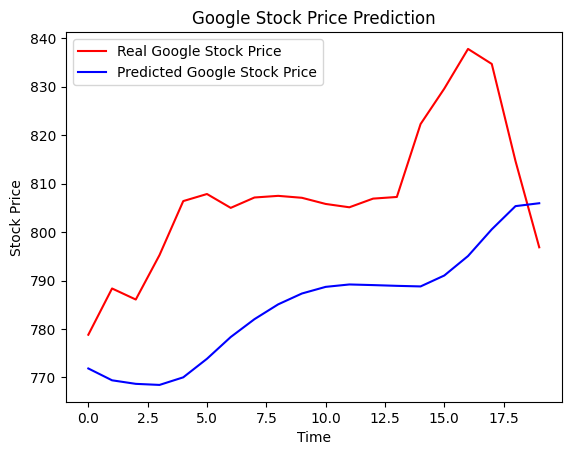

In [19]:
plt.plot(test_set, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()